# Underage overdoses
Teens can overdose on a single substance or multiple substances simultaneously. When mind-altering substances are combined, the effects of each substance can grow even more pronounced, making an overdose more likely. For example, if a teen abuses alcohol (a depressant) and also abuses Adderall (a stimulant) at the same time, they are subject to a wider variety of risks.

The data above is about drug overdoses between years 1995 and 2017.

Text(0.5, 1.0, 'Underage overdoses per year')

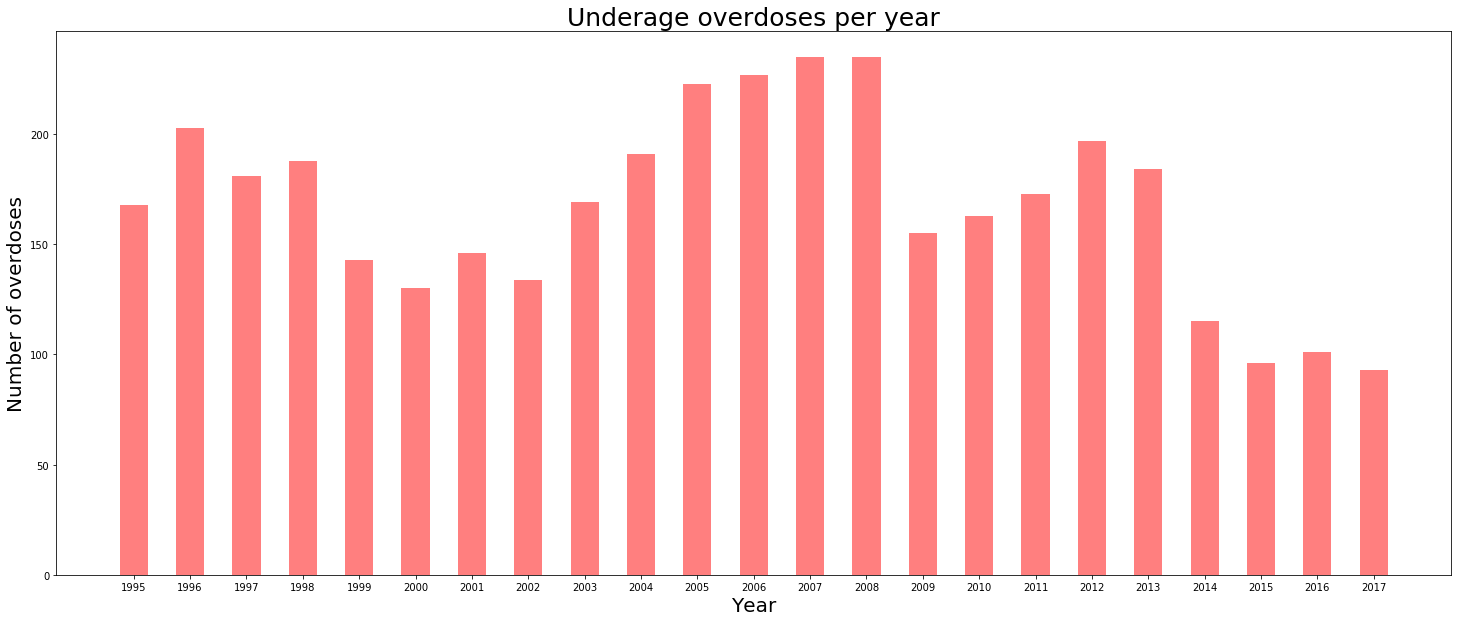

In [4]:
import pandas

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


f = pandas.read_excel("./tables/drugDeaths/deaths15-19.xlsx")
mrtvi=defaultdict(int)
for godina in range(2017,1994,-1):
    for i,j in f.iterrows():
        brojevi=np.sum(f[godina])
        mrtvi[godina]=brojevi
god=np.array([v for v in mrtvi.keys()])
god=god[::-1]
br=np.array([v for v in mrtvi.values()])
plt.figure(figsize=(25,10))
plt.bar(god,br,align="center",width=0.5,alpha=0.5,color="red")
plt.xticks(god)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses per year",fontsize=25)

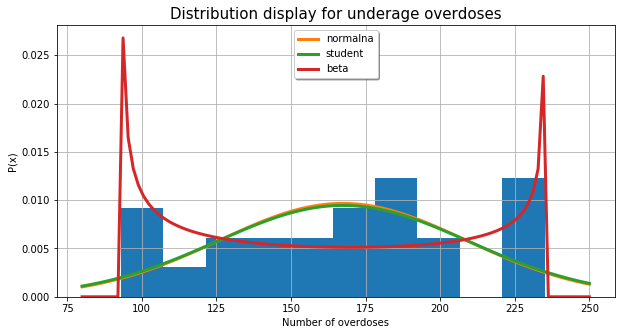

In [5]:
from scipy.stats import beta
from scipy.stats import multivariate_normal as mvn 
from scipy.stats import t as student 
n=23
g=np.linspace(80,250,100)
mu_fit = np.mean(br)
sigma2_fit = (n-1)/n * np.var(br)
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in g]
pars = student.fit(br)
Pt_fit = [student.pdf(x, *pars) for x in g ]
a, b = (3, 2)
parameters = beta.fit(br)
Pb_fit = [beta.pdf(x, *parameters) for x in g ]
plt.figure(figsize=(10,5))
plt.hist(br,bins=10,density=True)
plt.plot(g, P_fit, label="normalna", linewidth=3.0)
plt.plot(g,Pt_fit,label="student",linewidth=3.0)
plt.plot(g,Pb_fit,label="beta",linewidth=3.0)
plt.xlabel("Number of overdoses",fontsize=10)
plt.ylabel("P(x)",fontsize=10)
plt.title("Distribution display for underage overdoses",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

Text(0.5, 1.0, 'Z-score distribution for underage deaths')

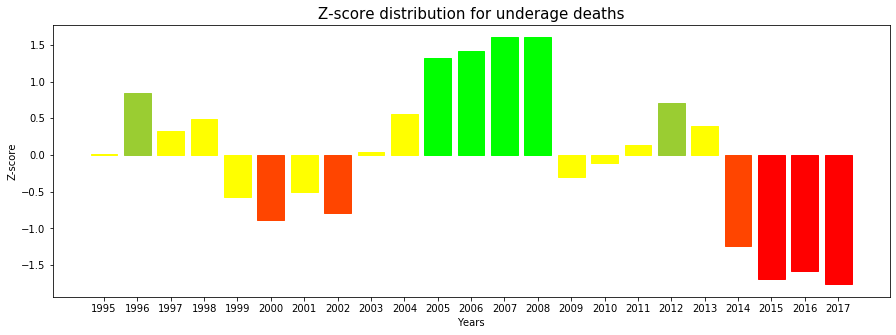

In [8]:
from scipy import stats
# coding=utf-8

zscores=dict(zip(god,stats.zscore([v for v in br])))
def getColor(zVal):
    val=""
    bot10 = stats.norm.ppf(0.1)
    top10 = stats.norm.ppf(1-0.1)
    
    bot30 = stats.norm.ppf(0.25)
    top30 = stats.norm.ppf(1-0.25)

    if zVal > bot10 and zVal < top10:

        if zVal > bot30 and zVal < top30:
            val="MEDIUM"
            return val
        if zVal> bot30:
            val="HIGH"
            return val
        val="LOW"
        return val

    if zVal> bot10:
        val="VERY HIGH"
        return val
    val="VERY LOW"
    return val

g=1995
scores=[]
for i in zscores.values():
    z=getColor(i)
    scores.append(z)
    g+=1
plt.figure(figsize=(15,5))
sc=plt.bar(zscores.keys(),zscores.values())
plt.xticks([i for i in range(1995,2018)])
for j,i in enumerate(scores):
    color="b"
    if(i=="MEDIUM"):
        color="yellow"
    elif(i=="HIGH"):
        color="yellowgreen"
    elif(i=="VERY HIGH"):
        color="lime"
    elif(i=="LOW"):
        color="orangered"
    else:
        color="red"
    sc[j].set_color(color)
plt.xlabel("Years",fontsize=10)
plt.ylabel("Z-score",fontsize=10)
plt.title("Z-score distribution for underage deaths",fontsize=15)

Text(0.5, 1.0, 'Underage overdoses by countries')

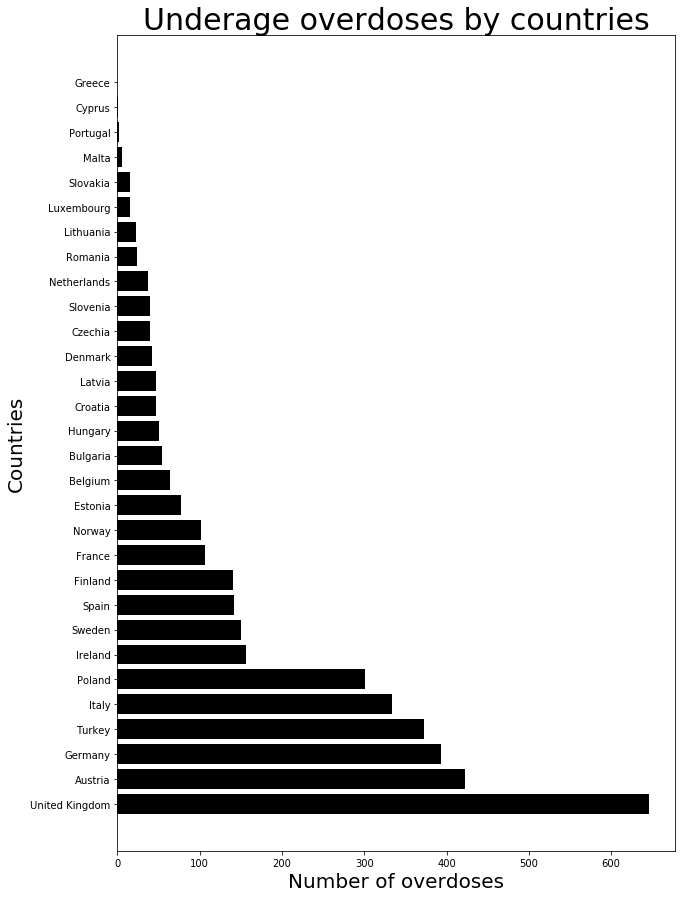

In [7]:
underage_zemlje={}
def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val
for i,row in f.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        underage_zemlje[country] = [row[col] for col in f.columns[:-1][1:]]
        nan_indx = np.isnan(underage_zemlje[country])
        replaceNan(underage_zemlje[country], nan_indx,0)
sortedzemlje = sorted(underage_zemlje, key = lambda k: sum(underage_zemlje[k]), reverse=True)
underage_deaths=[sum(underage_zemlje[i]) for i in sortedzemlje]
ypos=np.arange(len(sortedzemlje))
plt.figure(figsize=(10,15))
yt=np.array([v for v in sortedzemlje])
plt.yticks(ypos,yt)
plt.barh(ypos, underage_deaths, color="black")
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses by countries",fontsize=30)

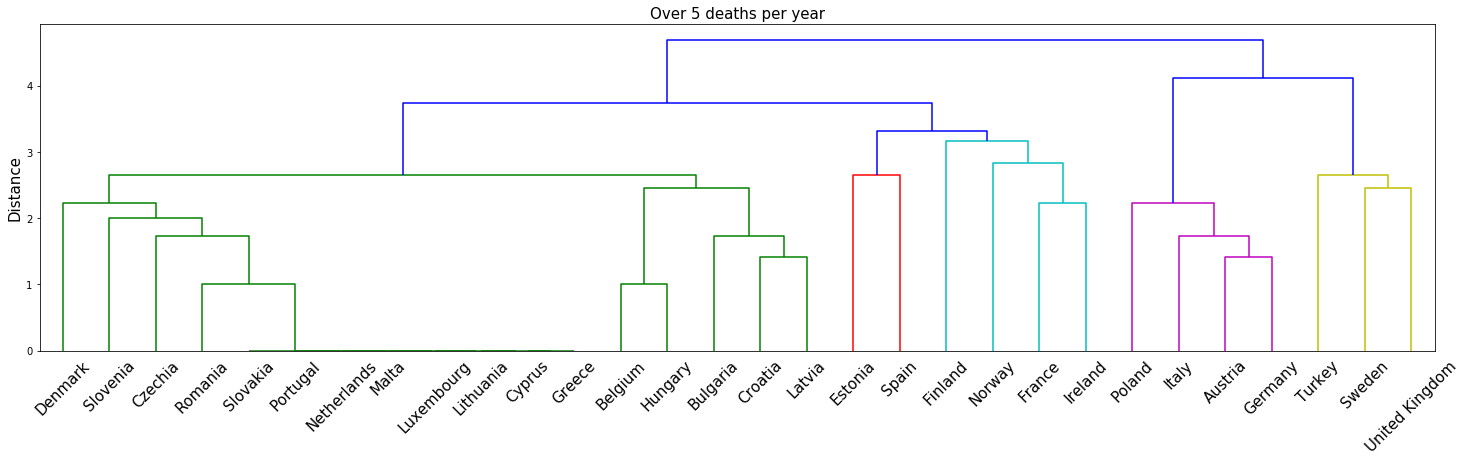

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
underage_d={}
for i,row in f.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        underage_d[country] = [row[col] for col in f.columns[:-1][1:]]
        nan_indx = np.isnan(underage_d[country])
        replaceNan(underage_d[country], nan_indx,0)
for value in underage_d.values():
    for i,el in enumerate(value):
        if(el>5):
            value[i]=1
        else:
            value[i]=0
matrix1=[]
for c in underage_d.keys():
    matrix1.append(underage_d[c])
L = sch.linkage(matrix1, method="complete", metric="euclidean")
plt.figure(figsize=(25, 6))
labels = [c for c in underage_d.keys()]
D    = sch.dendrogram(L, labels=labels, leaf_font_size=15)
plt.ylabel("Distance",fontsize=15)
plt.title("Over 5 deaths per year",fontsize=15)
plt.show()

In [ ]:
austria_underage=underage_zemlje["Austria"]
uk_underage=underage_zemlje["United Kingdom"]
germany_underage=underage_zemlje["Germany"]
turk_underage=underage_zemlje["Turkey"]
it_underage=underage_zemlje["Italy"]
godine=[i for i in range(2017,1994,-1)]
plt.figure(figsize=(15,7))
plt.plot(godine,austria_underage,color="blue",label="Austria",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,uk_underage,color="red",label="United Kingdom",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,germany_underage,color="green",label="Germany",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,turk_underage,color="purple",label="Turkey",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,it_underage,color="yellow",label="Italy",marker = ".", markersize = 9, markeredgecolor = "black")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Plot of underage overdose deaths in top 5 countries",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

# The elderly overdoses
Attempted suicide remains a serious clinical and public health issue, which appears to be rising in parallel with or exceeding suicide rates. Further, attempted suicide and attendant risk of death are of special importance in the elderly due to a combination of particular factors in old age, including failing physical and mental health and reduced income and social supports.

The data above is representing drug overdoses from 1995-2017 by people older than 60 years of age.

In [ ]:
f2 = pandas.read_excel("./tables/drugDeaths/deaths60-64.xlsx")
f3=pandas.read_excel("./tables/drugDeaths/deaths65-inf.xlsx")
mrtvi2=defaultdict(int)
mrtvi3=defaultdict(int)
for godina in range(2017,1994,-1):
    for i,j in f2.iterrows():
        brojevi=np.sum(f2[godina])
        mrtvi2[godina]=brojevi
for godina in range(2017,1994,-1):
    for i,j in f3.iterrows():
        brojevi=np.sum(f3[godina])
        mrtvi3[godina]=brojevi
m1=[m for m in mrtvi2.values()]
m2=[m for m in mrtvi3.values()]
m3=[]
for i in range(len(m1)):
    m3.append(m1[i]+m2[i])
god2=np.array([v for v in mrtvi2.keys()])
god2=god2[::-1]
plt.figure(figsize=(25,10))
plt.bar(god2,m3,align="center",width=0.5,alpha=0.5,color="red")
plt.xticks(god2)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of overdoses",fontsize=20)
plt.title("The elderly overdoses by year",fontsize=25)

In [ ]:
n=23
g=np.linspace(0,650,100)
mu_fit = np.mean(m3)
sigma2_fit = (n-1)/n * np.var(m3)
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in g]
pars = student.fit(m3)
Pt_fit = [student.pdf(x, *pars) for x in g ]
a, b = (3, 2)
parameters = beta.fit(m3)
Pb_fit = [beta.pdf(x, *parameters) for x in g ]
plt.figure(figsize=(10,5))
plt.hist(m3,bins=15,density=True)
plt.plot(g, P_fit, label="normalna", linewidth=3.0)
plt.plot(g,Pt_fit,label="student",linewidth=3.0)
plt.plot(g,Pb_fit,label="beta",linewidth=3.0)
plt.xlabel("Number of overdoses",fontsize=10)
plt.ylabel("P(x)",fontsize=10)
plt.title("Distribution display for elderly overdoses",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

In [ ]:
from scipy import stats
# coding=utf-8

zscores2=dict(zip(god2,stats.zscore([v for v in m3])))
g=1995
scores2=[]
for i in zscores2.values():
    z=getColor(i)
    scores2.append(z)
    g+=1
plt.figure(figsize=(15,5))
sc=plt.bar(zscores2.keys(),zscores2.values())
plt.xticks([i for i in range(1995,2018)])
for j,i in enumerate(scores2):
    color="b"
    if(i=="MEDIUM"):
        color="yellow"
    elif(i=="HIGH"):
        color="yellowgreen"
    elif(i=="VERY HIGH"):
        color="lime"
    elif(i=="LOW"):
        color="orangered"
    else:
        color="red"
    sc[j].set_color(color)
plt.xlabel("Years",fontsize=10)
plt.ylabel("Z-score",fontsize=10)
plt.title("Z-score distribution for elderly deaths",fontsize=15)

In [ ]:
import operator
overage_zemlje1={}
for i,row in f2.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        overage_zemlje1[country] = [row[col] for col in f2.columns[:-1][1:]]
        nan_indx = np.isnan(overage_zemlje1[country])
        replaceNan(overage_zemlje1[country], nan_indx,0)
sortedzemlje1 = sorted(overage_zemlje1, key = lambda k: sum(overage_zemlje1[k]), reverse=True)
overage_deaths=defaultdict(int)
for i in sortedzemlje1:
    overage_deaths[i]=sum(overage_zemlje1[i])
overage_zemlje2={}
for i,row in f3.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        overage_zemlje2[country] = [row[col] for col in f3.columns[:-1][1:]]
        nan_indx = np.isnan(overage_zemlje2[country])
        replaceNan(overage_zemlje2[country], nan_indx,0)
overage_deaths1=defaultdict(int)
for i in sortedzemlje1:
    overage_deaths1[i]=sum(overage_zemlje2[i])
smrti=defaultdict(int)
for i in overage_deaths1.keys():
    smrti[i]=overage_deaths[i]+overage_deaths1[i]
smrti1=dict( sorted(smrti.items(), key=operator.itemgetter(1),reverse=True))
zemlje=[z for z in smrti1.keys()]
over=[o for o in smrti1.values()]
overage_zemlje3={}
ypos1=np.arange(len(zemlje))
plt.figure(figsize=(10,15))
yt1=np.array([v for v in zemlje])
plt.yticks(ypos1,yt1)
plt.barh(ypos1, over, color="black")
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Number of overdoses",fontsize=20)
plt.title("The elderly overdoses by countries",fontsize=20)

In [ ]:
france_overage=overage_zemlje1["France"]
uk_overage=overage_zemlje1["United Kingdom"]
poland_overage=overage_zemlje1["Poland"]
sweden_overage=overage_zemlje1["Sweden"]
den_overage=overage_zemlje1["Denmark"]
godine=[i for i in range(2017,1994,-1)]
plt.figure(figsize=(15,7))
plt.plot(godine,france_overage,color="blue",label="France",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,uk_overage,color="red",label="United Kingdom",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,poland_overage,color="green",label="Poland",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,sweden_overage,color="purple",label="Sweden",marker = ".", markersize = 9, markeredgecolor = "black")
plt.plot(godine,den_overage,color="yellow",label="Denmark",marker = ".", markersize = 9, markeredgecolor = "black")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Plot of elderly overdoses in top 5 countries",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
elderly_d={}
for i,row in f3.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        elderly_d[country] = [row[col] for col in f3.columns[:-1][1:]]
        nan_indx = np.isnan(elderly_d[country])
        replaceNan(elderly_d[country], nan_indx,0)
for value in elderly_d.values():
    for i,el in enumerate(value):
        if(el!=0):
            value[i]=1
        else:
            value[i]=0
matrix=[]
for c in elderly_d.keys():
    matrix.append(elderly_d[c])
L = sch.linkage(matrix, method="complete", metric="euclidean")

plt.figure(figsize=(25, 6))
labels = [c for c in elderly_d.keys()]
D    = sch.dendrogram(L, labels=labels, leaf_font_size=15)
plt.ylabel("Distance",fontsize=15)
plt.title("Atleast 1 death per year",fontsize=15)
plt.show()